In [6]:
import matplotlib.pyplot as plt
import csv
from statistics import mean

In [7]:
#r2_score=[]
def classifier_perf_metric(cl):
  acc=[]
  precision=[]
  recall=[]
  f1_score=[]
  batch = []
  with open(cl+'.csv', 'r') as file:
    data = csv.reader(file, delimiter = ',')

    for row in data:
      #r2_score.append(float(row[0]))
      acc.append(float(row[1]))
      precision.append(float(row[2]))
      recall.append(float(row[3]))
      f1_score.append(float(row[4]))
  batch = [i+1 for i in range(len(acc))]
  plot_batch_vs_acc(acc, precision, recall, f1_score, batch)
  file.close()

def classifiers_metric(metric):
  classifiers = ["mNB", "bNB", "SGD"]
  metric_flag = 0
  metric_means=[]
  if metric == "accuracy":
    metric_flag = 1
  elif metric == "precision":
    metric_flag = 2
  elif metric == "recall":
    metric_flag = 3
  else:
    metric_flag = 4
  for i in classifiers:
    metric_list=[]
    with open(i+'.csv', 'r') as file:
      data = csv.reader(file, delimiter = ',')
      for row in data:
          metric_list.append(float(row[metric_flag]))
      metric_means.append(mean(metric_list))
  file.close()
  plt.bar(classifiers, metric_means, color = 'r', label = 'avg performance for '+metric)
  plt.xlabel('Classifier')
  plt.ylabel(metric)
  plt.legend()
  plt.show()

In [3]:
'''plt.bar(batch, r2_score, color = 'g', label = 'r2_score for each batch')
plt.xlabel('Batch')
plt.ylabel('r2_score')
plt.legend()
plt.show()'''

"plt.bar(batch, r2_score, color = 'g', label = 'r2_score for each batch')\nplt.xlabel('Batch')\nplt.ylabel('r2_score')\nplt.legend()\nplt.show()"

In [4]:
def plot_batch_vs_acc(acc, precision, recall, f1_score, batch):
  #batch=[1,2,3,4,5,6,7,8,9]
  plt.bar(batch, acc, color = 'r', label = 'accuracy for each batch')
  plt.xlabel('Batch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  plt.bar(batch, precision, color = 'b', label = 'precision for each batch')
  plt.xlabel('Batch')
  plt.ylabel('Precision')
  plt.legend()
  plt.show()

  plt.bar(batch, recall, color = 'y', label = 'recall for each batch')
  plt.xlabel('Batch')
  plt.ylabel('Recall')
  plt.legend()
  plt.show()

  plt.bar(batch, f1_score, color = 'm', label = 'f1 score for each batch')
  plt.xlabel('Batch')
  plt.ylabel('f1 score')
  plt.legend()
  plt.show()

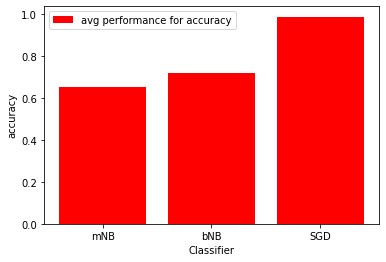

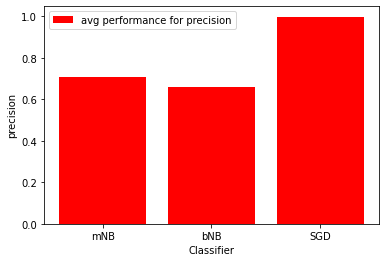

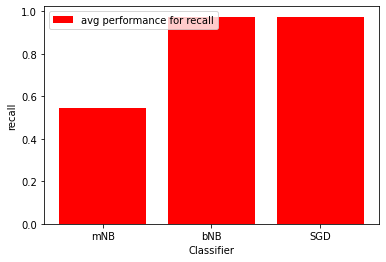

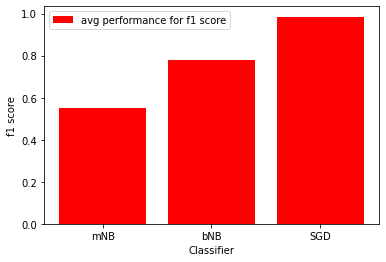

In [10]:
classifiers_metric('accuracy')
classifiers_metric('precision')
classifiers_metric('recall')
classifiers_metric('f1 score')

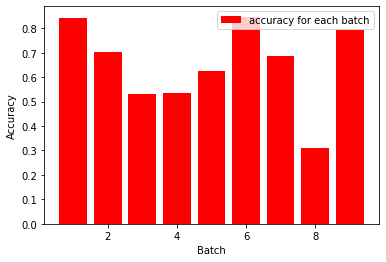

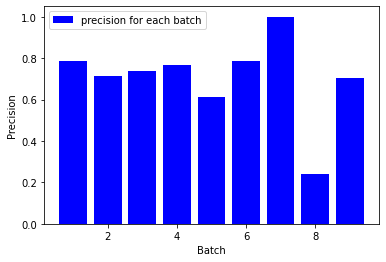

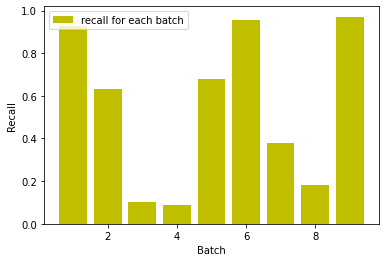

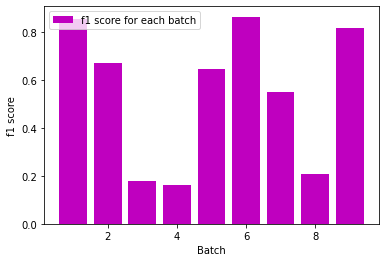

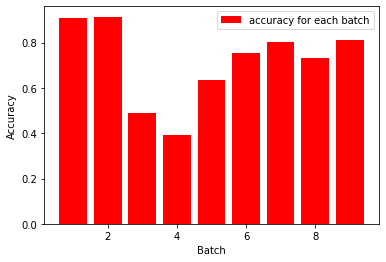

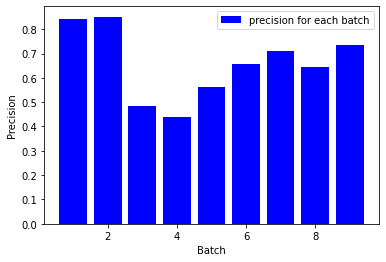

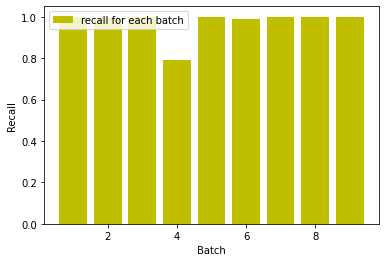

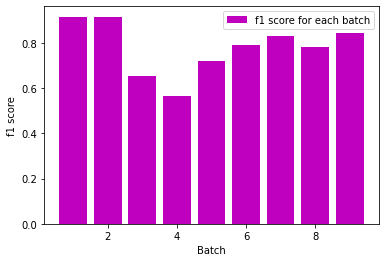

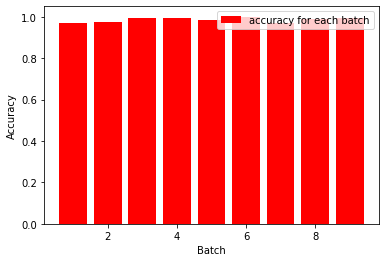

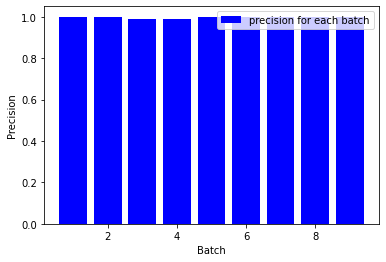

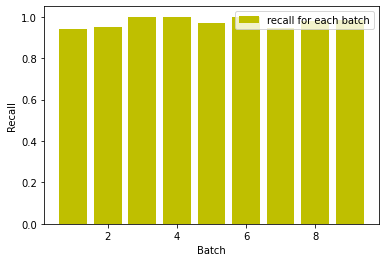

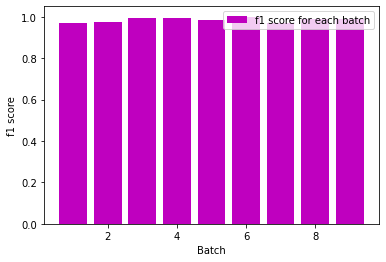

In [5]:
classifier_perf_metric('mNB')
classifier_perf_metric('bNB')
classifier_perf_metric('SGD')